In [1]:
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
from collections import Counter
%matplotlib inline
import plotly
import math
import plotly.graph_objs as go
from sklearn.preprocessing import MinMaxScaler

In [3]:
plotly.offline.init_notebook_mode(connected=True)

In [15]:
trace = go.Heatmap(z=[[ 1, 0.07625544],
                      [ 0.07625544,1]],
                   colorscale = 'Viridis',
                  x=['Trust score','Review score'],
                  y=['Trust socre', 'Review score'],
                  name='Correlation Matrix')
layout=go.Layout(
title='Correlation Matrix')
data=[trace]
plotly.offline.iplot(data,filename='basic-heatmap')

# Read data

In [4]:
data = pd.read_csv('listings_details.csv')
reviews = pd.read_csv('reviews.csv')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40629 entries, 0 to 40628
Data columns (total 95 columns):
id                                  40629 non-null int64
listing_url                         40629 non-null object
scrape_id                           40629 non-null int64
last_scraped                        40629 non-null object
name                                40629 non-null object
summary                             39206 non-null object
space                               27790 non-null object
description                         40619 non-null object
experiences_offered                 40629 non-null object
neighborhood_overview               23574 non-null object
notes                               14898 non-null object
transit                             25481 non-null object
access                              23745 non-null object
interaction                         22590 non-null object
house_rules                         25905 non-null object
thumbnail_url          

In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646717 entries, 0 to 646716
Data columns (total 6 columns):
listing_id       646717 non-null int64
id               646717 non-null int64
date             646717 non-null object
reviewer_id      646717 non-null int64
reviewer_name    646717 non-null object
comments         646038 non-null object
dtypes: int64(3), object(3)
memory usage: 29.6+ MB


# Review score and trust score

In [5]:
review_scores_value = data["review_scores_value"].fillna(value="null")

In [21]:
review_scores_accuracy = data['review_scores_accuracy']

In [6]:
review_detail = reviews['comments']
listing_id = reviews['listing_id']
id = data['id']
listing_unique_id = set(listing_id)

In [7]:
review_scores_indices = []
review_scores = []
for i in range(len(review_scores_value)):
    if type(review_scores_value[i]) != str:
        review_scores_indices.append(i)
        review_scores.append(review_scores_value[i])
        
id_has_review_score = []
for i in range(len(review_scores_indices)):
    id_has_review_score.append(id[review_scores_indices[i]])

In [8]:
review_scores[0:10]

[10.0, 9.0, 10.0, 10.0, 10.0, 10.0, 9.0, 10.0, 2.0, 10.0]

# Sentiment Analysis

In [9]:
host_is_superhost = data['host_is_superhost']
host_is_superhost = host_is_superhost.fillna(value=0)
host_is_superhost=list(host_is_superhost)
for i in range(len(host_is_superhost)):
    if host_is_superhost[i] == 't':
        host_is_superhost[i] = 1
    elif host_is_superhost[i] == 'f':
        host_is_superhost[i] = 0
    else:
        host_is_superhost[i] = 0
superhost_indices = [i for i in range(len(host_is_superhost)) if host_is_superhost[i] == 1]
not_superhost_indices = [i for i in range(len(host_is_superhost)) if host_is_superhost[i] == 0]

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
score = []
for i in range(len(review_detail)):
    try:
        vs = analyzer.polarity_scores(review_detail[i])
        score.append(vs['compound'])
    except:
        score.append(0)
    if i%100000 == 0:
        print('Analyzed',i,'reviews')
reviews_detail_id = list(zip(listing_id, score))

Analyzed 0 reviews
Analyzed 100000 reviews
Analyzed 200000 reviews
Analyzed 300000 reviews
Analyzed 400000 reviews
Analyzed 500000 reviews
Analyzed 600000 reviews


In [18]:
reviews_dict_pos = dict(zip(listing_unique_id,[0]*len(listing_unique_id)))
reviews_dict_neu = dict(zip(listing_unique_id,[0]*len(listing_unique_id)))
reviews_dict_neg = dict(zip(listing_unique_id,[0]*len(listing_unique_id)))
for i in range(len(reviews_detail_id)):
    if reviews_detail_id[i][1] >= 0.5:
        reviews_dict_pos[reviews_detail_id[i][0]] += 1
    elif reviews_detail_id[i][1] > -0.5 and reviews_detail_id[i][1] < 0.5:
        reviews_dict_neu[reviews_detail_id[i][0]] += 1
    else:
        reviews_dict_neg[reviews_detail_id[i][0]] += 1

In [10]:
superhost_id = []
for i in range(len(superhost_indices)):
    superhost_id.append(id[superhost_indices[i]])

not_superhost_id = []
for i in range(len(not_superhost_indices)):
    not_superhost_id.append(id[not_superhost_indices[i]])

In [11]:
reviews_detail_id_dict = dict(reviews_detail_id)

NameError: name 'reviews_detail_id' is not defined

In [21]:
reviews_detail_id[0][1]

0.6022

In [22]:
superhost_pos = []
superhost_neg = []
superhost_neu = []
not_superhost_pos = []
not_superhost_neu = []
not_superhost_neg = []
for i in range(len(reviews_detail_id)):
    if reviews_detail_id[i][0] in superhost_id:
        if reviews_detail_id[i][1] >= 0.5:
            superhost_pos.append(reviews_detail_id[i][1])
        elif reviews_detail_id[i][1] > -0.5 and reviews_detail_id[i][1] <0.5:
            superhost_neu.append(reviews_detail_id[i][1])
        else:
            superhost_neg.append(reviews_detail_id[i][1])
    elif reviews_detail_id[i][0] in not_superhost_id:
        if reviews_detail_id[i][1] >= 0.5:
            not_superhost_pos.append(reviews_detail_id[i][1])
        elif reviews_detail_id[i][1] > -0.5 and reviews_detail_id[i][1] <0.5:
            not_superhost_neu.append(reviews_detail_id[i][1])
        else:
            not_superhost_neg.append(reviews_detail_id[i][1])
    else:
        continue
    

In [12]:
superhost_has_score_indices = list(set(review_scores_indices).intersection(superhost_indices))
not_superhost_has_score_indices = list(set(review_scores_indices).intersection(not_superhost_indices))

In [13]:
superhost_review_score = []
not_superhost_review_score = []
for i in range(len(superhost_has_score_indices)):
    superhost_review_score.append(review_scores_value[superhost_has_score_indices[i]])
for i in range(len(not_superhost_has_score_indices)):
    not_superhost_review_score.append(review_scores_value[not_superhost_has_score_indices[i]])

In [16]:
superhost_trust_score = []
not_superhost_trust_score = []
for i in range(len(superhost_has_score_indices)):
    superhost_trust_score.append(trust_scores[superhost_has_score_indices[i]])
for i in range(len(not_superhost_has_score_indices)):
    not_superhost_trust_score.append(trust_scores[not_superhost_has_score_indices[i]])

In [27]:
# Normalization
min_max_scaler = MinMaxScaler()
superhost_trust_score_minmax = min_max_scaler.fit_transform(superhost_trust_score)
superhost_review_score_minmax = min_max_scaler.fit_transform(superhost_review_score)
not_superhost_review_score_minmax = min_max_scaler.fit_transform(not_superhost_review_score)
not_superhost_trust_score_minmax = min_max_scaler.fit_transform(not_superhost_trust_score)

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required by MinMaxScaler.

# Correlation coefficient 

In [28]:
trust_scores_super_notsuper = superhost_trust_score + not_superhost_trust_score
review_scores_super_notsuper = superhost_review_score + not_superhost_review_score
print("Correlation matrix between trust score and review score")
print(np.corrcoef(trust_scores_super_notsuper, review_scores_super_notsuper))
print("Correlation matrix between trust score and review score (superhost)")
print(np.corrcoef(superhost_trust_score,superhost_review_score))
print("Correlation matrix between trust score and review score (regular host)")
print(np.corrcoef(not_superhost_trust_score,not_superhost_review_score))

Correlation matrix between trust score and review score


ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [ ]:
trace = go.Heatmap(z=[[ 1, 0.07625544],
                      [ 0.07625544,1]],
                   colorscale = 'Viridis',
                  x=['Trust score','Review score'],
                  y=['Trust socre', 'Review score'],
                  name='Correlation Matrix')
layout=go.Layout(
title='Correlation Matrix')
data=[trace]
plotly.offline.iplot(data,filename='basic-heatmap')

In [23]:
review_trust = [[superhost_review_score],[superhost_trust_score]]

In [22]:
len(z)

2

In [18]:
trace1 = go.Scatter(
    x = superhost_review_score,
    y = superhost_trust_score,
    mode='markers',
    marker=dict(
        size='16',
        color = superhost_trust_score, #set color equal to a variable
        colorscale='Viridis',
        showscale=True
    )
)
layout = go.Layout(
    title="Superhost review score & Trust score",
    xaxis=dict(
    title="review score "),
    yaxis=dict(
    title="trust score"))
data = [trace1]
fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig, filename='scatter-plot-with-colorscale')

In [20]:
trace1 = go.Scatter(
    x = not_superhost_review_score,
    y = not_superhost_trust_score,
    mode='markers',
    marker=dict(
        size='16',
        color = not_superhost_trust_score, #set color equal to a variable
        colorscale='Viridis',
        showscale=True
    )
)
layout = go.Layout(
    title="Regular host review score & Trust score)",
    xaxis=dict(
    title="review score "),
    yaxis=dict(
    title="trust score"))
data = [trace1]
fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig, filename='scatter-plot-with-colorscale')

In [118]:
trace0 = go.Histogram(x=superhost_review_score,
                     histnorm='probability',
                     name='Superhost',
                     marker=dict(
                     color='#1C89FF'))
trace1= go.Histogram(x=not_superhost_review_score,
                    histnorm='probability',
                    name='Regular host',
                    marker=dict(
                    color='#FF5919'))
# data = [go.Histogram(x=superhost_review_score, histnorm='probability')]
layout = go.Layout(
    title='Distribution of Review Score',
    xaxis=dict(
        title='Score'
    ),
    yaxis=dict(
        title='Proportion'
    ),
    bargap=0.2,
    bargroupgap=0.1
)
fig = go.Figure(data=[trace0, trace1], layout=layout)
plotly.offline.iplot(fig, filename='basic histogram')

In [60]:
# Plot standard error of the mean
def error_mean(mean, std, name,title,myrange):
    trace0 = go.Bar(
        x=[name[0]],
        y=[mean[0]],
        name=name[0],
        marker=dict(
        color="#1C89FF"),
    
        error_y=dict(
            type='data',
            array=[std[0]],
            visible=True
    )
    )
        
    trace1 = go.Bar(
        x=[name[1]],
        y=[mean[1]],
        name=name[1],
        marker=dict(
        color="#FF5919"),
    
        error_y=dict(
            type='data',
            array=[std[1]],
            visible=True
     )
    )
    data = [trace0,trace1]
    layout = go.Layout(
        title='Standard Error of the Mean'+' ('+ title + ')',
        yaxis=dict(
        title='Score',
        range=myrange
    ),
    bargap=0.2,
    bargroupgap=0.1
    )

    fig = go.Figure(data=data, layout=layout)
    plotly.offline.iplot(fig, filename='error-bar-bar')

In [61]:
review_score_mean_super = stat.mean(superhost_review_score)
review_score_std_super = stat.stdev(superhost_review_score)/math.sqrt(len(superhost_review_score))
review_score_mean_notsuper = stat.mean(not_superhost_review_score)
review_score_std_notsuper = stat.stdev(not_superhost_review_score)/math.sqrt(len(not_superhost_review_score))
error_mean([review_score_mean_super,review_score_mean_notsuper],[review_score_std_super,review_score_std_notsuper],["superhost","regular host"],'Review score',[9.2,9.8])

In [45]:
superhost_pos_counter = dict(Counter(superhost_pos).most_common())
superhost_neg_counter = dict(Counter(superhost_neg).most_common())
not_superhost_pos_counter = dict(Counter(not_superhost_pos).most_common())
not_superhost_neg_counter = dict(Counter(not_superhost_neg).most_common())

In [46]:
superhost_reviews_num = len(superhost_pos) + len(superhost_neg) + len(superhost_neu)
not_superhost_reviews_num = len(not_superhost_pos) + len(not_superhost_neg) + len(superhost_neu)

(-1.1532073126943629,
 1.1025336815568687,
 -1.0917193461354675,
 1.122394086683177)

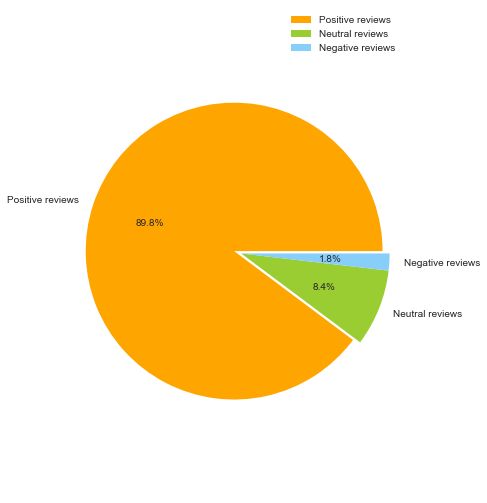

In [82]:
plt.figure(figsize=(6,9))
labels = ['Positive reviews', 'Neutral reviews','Negative reviews']
sizes = [len(superhost_pos), len(superhost_neu), len(superhost_neg)]
colors = ['orange','yellowgreen','lightskyblue']
explode = (0.05, 0,0)
plt.pie(sizes, explode=explode, labels=labels,colors=colors, labeldistance = 1.1, autopct = '%3.1f%%')
plt.legend()
plt.axis('equal')

(-1.1514639103059594,
 1.1024506623955193,
 -1.081175811443247,
 1.1305529356640027)

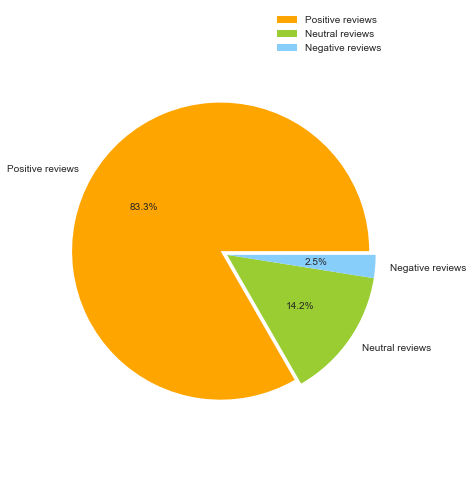

In [83]:
plt.figure(figsize=(6,9))
labels = ['Positive reviews', 'Neutral reviews','Negative reviews']
sizes = [len(not_superhost_pos), len(not_superhost_neu), len(not_superhost_neg)]
colors = ['orange','yellowgreen','lightskyblue']
explode = (0.05, 0,0)
plt.pie(sizes, explode=explode, labels=labels,colors=colors, labeldistance = 1.1, autopct = '%3.1f%%')
plt.legend()
plt.axis('equal')

In [47]:
average_reviews_num_super = superhost_reviews_num/len(superhost_id)
average_reviews_num_notsuper = not_superhost_reviews_num/len(not_superhost_id)
average_reviews_num_super_pos = len(superhost_pos)/len(superhost_id)
average_reviews_num_super_neg = len(superhost_neg)/len(superhost_id)
average_reviews_num_super_neu = len(superhost_neu)/len(superhost_id)
average_reviews_num_notsuper_pos = len(not_superhost_pos)/len(not_superhost_id)
average_reviews_num_notsuper_neg = len(not_superhost_neg)/len(not_superhost_id)
average_reviews_num_notsuper_neu = len(not_superhost_neu)/len(not_superhost_id)

<Container object of 2 artists>

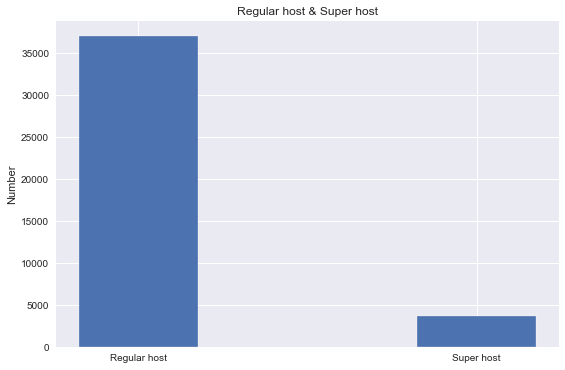

In [86]:
plt.figure(figsize=(9,6))
y = [36983, 3611]
x = [0,1]
labels = ['Regular host', 'Super host']
plt.title('Regular host & Super host')
# plt.xlabel('superhost or not')
plt.ylabel('Number')
plt.bar(range(2),y,width=0.35,edgecolor = 'white',tick_label=labels)

In [15]:
host_response_rate = data['host_response_rate']
host_response_rate = host_response_rate.fillna(value=0)
for i in range(len(host_response_rate)):
    if host_response_rate[i] != 0:
        host_response_rate[i] = float(host_response_rate[i].strip('%'))/100
host_response_rate_dict = dict(Counter(host_response_rate).most_common())

num_verifications = []
for i in range(len(data)):
    num_verifications.append(len(data['host_verifications'][i].split(',')))
    
num_verifications_tuples = list(Counter(num_verifications).most_common())
num_verifications_counts = [item[1] for item in num_verifications_tuples]

num_verifications_normalized = [float(item)/12 for item in num_verifications]
num_verifications_normalized_dict = dict(zip(range(1, len(num_verifications_counts)+1), num_verifications_normalized))
host_identity_verified = data['host_identity_verified']
host_identity_verified = host_identity_verified.fillna(value=0)
for i in range(len(host_identity_verified)):
    if host_identity_verified[i] == 't':
        host_identity_verified[i] = 1
    elif host_identity_verified[i] == 'f':
        host_identity_verified[i] =0
    else:
        host_identity_verified[i] = 0
        
host_has_profile_pic = data['host_has_profile_pic']
host_has_profile_pic = host_has_profile_pic.fillna(value=0)
for i in range(len(host_has_profile_pic)):
    if host_has_profile_pic[i] == 't':
        host_has_profile_pic[i] = 1
    elif host_has_profile_pic[i] == 'f':
        host_has_profile_pic[i] =0
    else:
        host_has_profile_pic[i] = 0


number_of_reviews = data['number_of_reviews']
maximum = max(number_of_reviews)
number_of_reviews_norm = [float(i)/maximum for i in number_of_reviews]
number_of_reviews_tuples = list(Counter(number_of_reviews).most_common())


trust_scores = []
for i in range(len(data)):
    score = host_has_profile_pic[i] + host_identity_verified[i] + host_response_rate[i]+ \
            num_verifications_normalized[i]
    trust_scores.append(score)

indices_superhost = []
indices_not_superhost = []
for i in range(len(host_is_superhost)):
    if host_is_superhost[i] == 1:
        indices_superhost.append(i)
    else:
        indices_not_superhost.append(i)

trust_scores_superhost = []
trust_scores_not_superhost = []
for i in range(len(indices_superhost)):
    trust_scores_superhost.append(trust_scores[indices_superhost[i]])
for j in range(len(indices_not_superhost)):
    trust_scores_not_superhost.append(trust_scores[indices_not_superhost[j]])

In [148]:
trace_response_rate = go.Histogram(
x=host_response_rate,
histnorm='probability',
marker=dict(
color='#1C89FF'),
)

layout=go.Layout(
title='Distribution of host response rate',
yaxis=dict(
title='Proportion'))

fig = go.Figure(data=[trace_response_rate], layout=layout)
plotly.offline.iplot(fig,filename='normalized histogram')

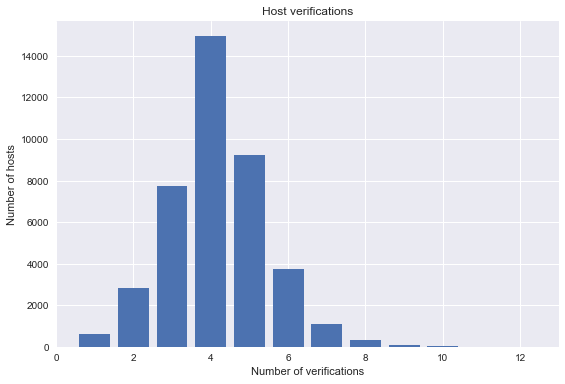

In [94]:
plt.figure(figsize=(9,6))
x = range(1,len(num_verifications_counts)+1)
y = num_verifications_counts
# labels = ['0.2','0.4','0.6','0.8','1.0']
plt.title('Host verifications')
plt.ylabel('Number of hosts')
plt.xlabel('Number of verifications')
plt.bar(x,y)
plt.show()

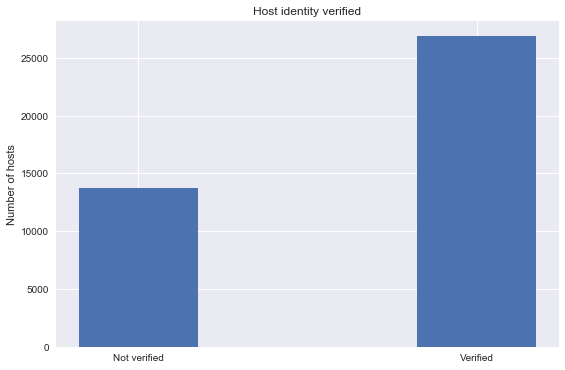

In [125]:
plt.figure(figsize=(9,6))
x = [0,1]
y = [13768, 26861]
labels = ['Not verified','Verified']
plt.title('Host identity verified')
plt.ylabel('Number of hosts')
plt.bar(x,y,tick_label=labels,width=0.35)
plt.show()

In [168]:
list(host_has_profile_pic).count(0)/40629

0.004848753353515961

In [169]:
list(host_has_profile_pic).count(1)

40432

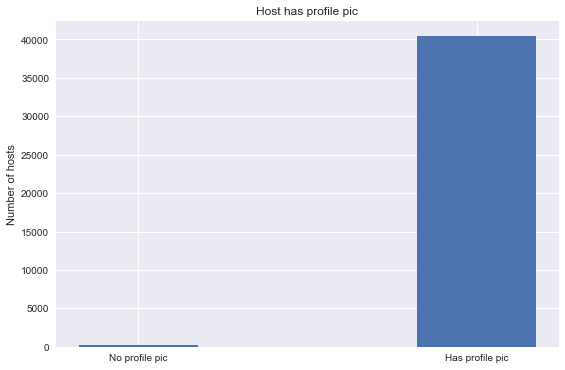

In [133]:
plt.figure(figsize=(9,6))
x = [0,1]
y = [197, 40432]
labels = ['No profile pic','Has profile pic']
plt.title('Host has profile pic')
plt.ylabel('Number of hosts')
plt.bar(x,y,tick_label=labels,width=0.35)
plt.show()

In [181]:
trace_trust_score_super = go.Histogram(
x=trust_scores_superhost,
name="Superhost",
histnorm='probability',
marker=dict(
color="#1C89FF"))

trace_trust_score_not_super = go.Histogram(
x=trust_scores_not_superhost,
name="Regular host",
histnorm="probability",
marker=dict(
color="#FF5919"))

data_trust_score=[trace_trust_score_super,trace_trust_score_not_super]

layout=go.Layout(
title="Distribution of trust score",
yaxis=dict(
title="Proportion"),
xaxis=dict(
title='Score'))

fig=go.Figure(data=data_trust_score,layout=layout)
plotly.offline.iplot(fig, filename="trust score histogram")



In [63]:
trust_scores_superhost_mean = stat.mean(trust_scores_superhost)
trust_scores_not_superhost_mean = stat.mean(trust_scores_not_superhost)
trust_scores_superhost_std = stat.stdev(trust_scores_superhost)/math.sqrt(len(trust_scores_superhost))
trust_scores_not_superhost_std = stat.stdev(trust_scores_not_superhost)/math.sqrt(len(trust_scores_not_superhost))
error_mean([trust_scores_superhost_mean,trust_scores_not_superhost_mean],[trust_scores_superhost_std,trust_scores_not_superhost_std],["superhost","regular host"],'Trust score',[2.5,3.5])

In [ ]:
trust_scores

In [251]:
price[0:10]

0    $102.00
1    $135.00
2     $88.00
3    $108.00
4     $45.00
5     $98.00
6     $49.00
7     $55.00
8    $145.00
9     $78.00
Name: price, dtype: object

In [65]:
price=data['price']

In [ ]:
for i in range(len(price)):
    price[i] = float(price[i].strip("$").replace(',',''))

/Users/juechizzz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [ ]:
for i in range(len(price)):
    price[i] = float(price[i].strip("$").replace(',',''))

/Users/juechizzz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

